# Gender Prediction


## Importing essential packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier



In [2]:
df = pd.read_csv("../projectcsv.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.std()

Height     3.847528
Weight    32.108439
dtype: float64

In [4]:
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Target Variable Set 
## Train and Test Data Split

In [5]:
X = df[["Weight", "Height"]]
y = df["Gender"]

X_train,X_test,y_train,y_test=train_test_split(X, y, 
                    random_state=42, test_size=0.30)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Accuracy

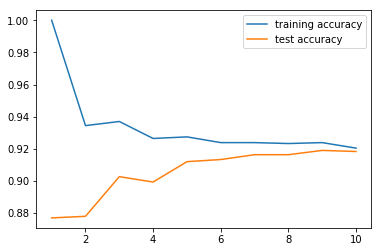

In [7]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
 # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()


## Model

In [8]:
kn = KNeighborsClassifier(n_neighbors=9)
kn.fit(X_train_scaled, y_train)
print('TESTING SCORE',kn.score(X_test_scaled, y_test))
print('TRAINING SCORE',kn.score(X_train_scaled,y_train))


TESTING SCORE 0.916
TRAINING SCORE 0.9211428571428572


In [9]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train_scaled,y_train)
print('TESTING SCORE',lr.score(X_test_scaled, y_test))
print('TRAINING SCORE',lr.score(X_train_scaled,y_train))


TESTING SCORE 0.9226666666666666
TRAINING SCORE 0.9181428571428571


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

['Male' 'Male' 'Male' ... 'Male' 'Female' 'Male']
Gender
Female    5000
Male      5000
dtype: int64
Gender
Female    1455
Male      1545
dtype: int64


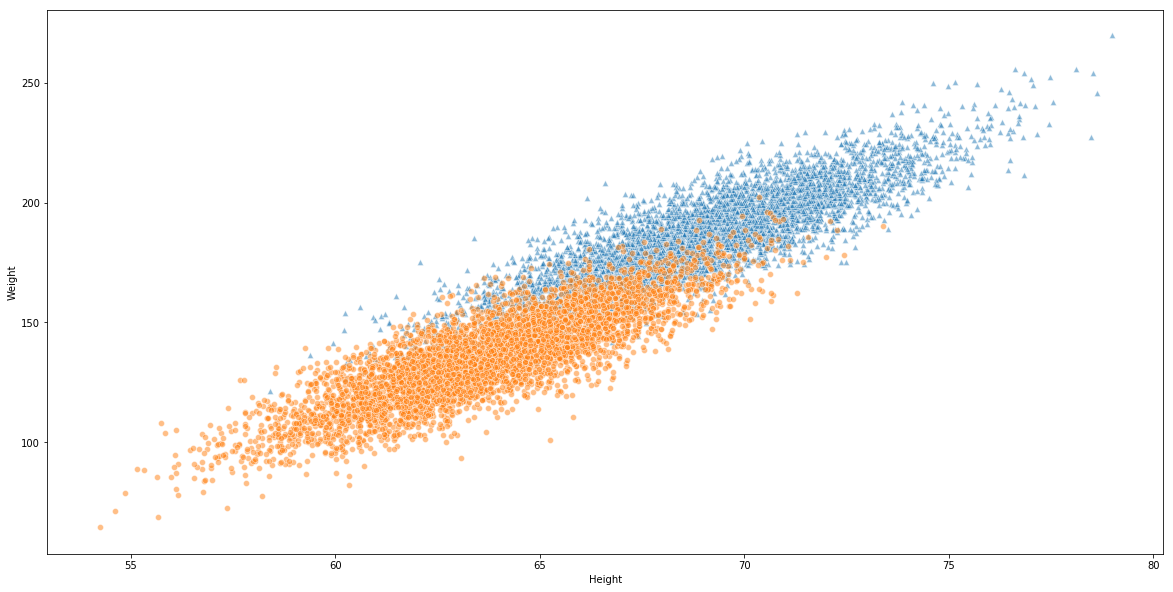

In [15]:

y_pred = kn.predict(X_test_scaled)
print(y_pred)


y_pred_df=pd.DataFrame(data=y_pred,columns=["Gender"])

print(df.groupby("Gender").size())

print(y_pred_df.groupby("Gender").size())

plt.figure(figsize=(20, 10))

genderMale=df[df.Gender=="Male"]
genderFemale=df[df.Gender=="Female"]

sns.scatterplot(y=genderMale.iloc[:,2],x=genderMale.iloc[:,1],marker='^',alpha=0.5)
sns.scatterplot(y=genderFemale.iloc[:,2],x=genderFemale.iloc[:,1],marker='o',alpha=0.5)


plt.show()

## Confusion Matrix

In [38]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred))

Confusion Matrix :
[[1333  130]
 [ 122 1415]]
Accuracy Score : 0.916


In [39]:
y_test=pd.DataFrame(data=y_test,columns=["Gender"])

## Visualization

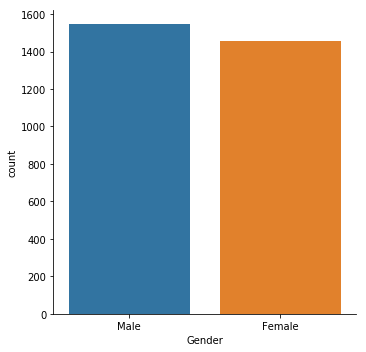

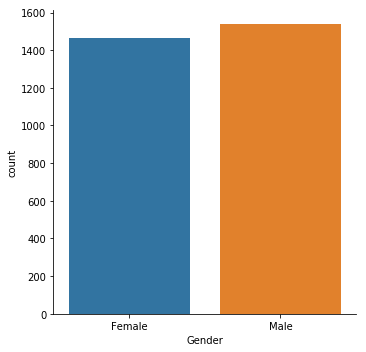

In [40]:
a=sns.catplot(x="Gender",kind="count",data=y_pred_df)
b=sns.catplot(x="Gender",kind="count",data=y_test)
a.set_titles("PREDICTED")
b.set_titles("TESTED")


In [41]:
male=df[df.Gender=='Male']
print(type(male))
female=df[df.Gender=='Female']

<class 'pandas.core.frame.DataFrame'>


Male Height Mean: 69.02634590621737
Female Heigh Mean: 63.708773603424916


Text(0.5, 1.0, 'ALL DATA')

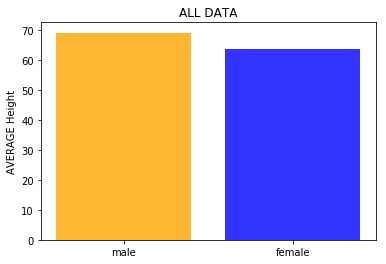

In [42]:

mwh=pd.DataFrame(data=male,columns=["Height","Weight"])
fwh=pd.DataFrame(data=female,columns=["Height","Weight"])
height_mean=mwh.iloc[:,0].mean()
weight_mean=mwh.iloc[:,1].mean()

fheight_mean=fwh.iloc[:,0].mean()
fweight_mean=fwh.iloc[:,1].mean()

print('Male Height Mean:',height_mean)
print('Female Heigh Mean:',fheight_mean)

height=(height_mean,fheight_mean)
index=np.arange(2)
width=0.8


plt.bar(index,height,width,alpha=0.8,color=['orange','blue'])
plt.xticks(index,('male','female'))
plt.ylabel('AVERAGE Height')
plt.title('ALL DATA')



Male Weight Mean: 187.0206206581929
Female Weigh Mean: 135.8600930074687


Text(0.5, 1.0, 'ALL DATA')

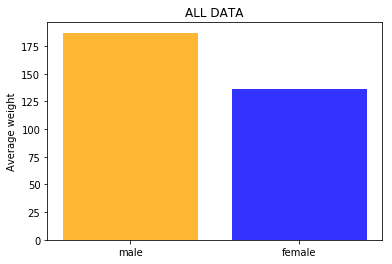

In [43]:
weight=(weight_mean,fweight_mean)
index=np.arange(2)
width=0.8

print('Male Weight Mean:',weight_mean)
print('Female Weigh Mean:',fweight_mean)


plt.bar(index,weight,width,color=['orange','blue'],alpha=0.8)
plt.xticks(index,('male','female'))
plt.ylabel('Average weight')
plt.title('ALL DATA')


In [44]:

print(y_pred_df.head())


  Gender
0   Male
1   Male
2   Male
3   Male
4   Male


In [26]:
x_test_new=X_test.reset_index()
x_test_new=x_test_new[["Weight","Height"]]

newdf=pd.concat([y_pred_df,x_test_new],axis=1)

print(newdf.head())

  Gender      Weight     Height
0   Male  173.115813  68.687232
1   Male  195.162042  68.829334
2   Male  170.217451  66.398128
3   Male  215.049660  71.929340
4   Male  182.721452  67.042903


Mean Male Height: 69.196607074138
Mean Female Height: 63.59106543524525


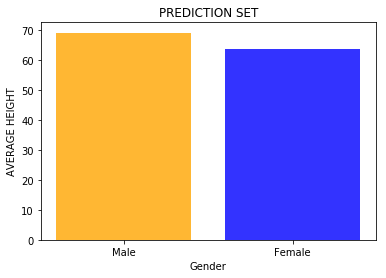

In [27]:

mean_male_height=newdf[newdf.Gender=="Male"].Height.mean()
mean_male_weight=newdf[newdf.Gender=="Male"].Weight.mean()

mean_female_height=newdf[newdf.Gender=="Female"].Height.mean()
mean_female_weight=newdf[newdf.Gender=="Female"].Weight.mean()

print('Mean Male Height:',mean_male_height)
print('Mean Female Height:',mean_female_height)

plt.bar([0,1],[mean_male_height,mean_female_height],width=0.8,color=['orange','blue'],alpha=0.8)
plt.xticks([0,1],['Male','Female'])
plt.xlabel('Gender')
plt.ylabel('AVERAGE HEIGHT')
plt.title('PREDICTION SET')


plt.show()

Text(0.5, 1.0, 'PREDICTION SET')

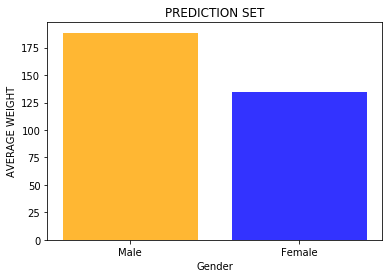

In [28]:
plt.bar([0,1],[mean_male_weight,mean_female_weight],width=0.8,color=['orange','blue'],alpha=0.8)
plt.xticks([0,1],['Male','Female'])
plt.xlabel('Gender')
plt.ylabel('AVERAGE WEIGHT')


plt.title('PREDICTION SET')

Text(0.5, 1.0, 'TEST SET')

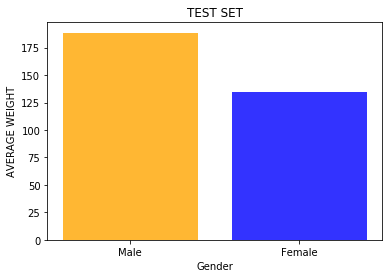

In [29]:
plt.bar([0,1],[mean_male_weight,mean_female_weight],width=0.8,color=['orange','blue'],alpha=0.8)
plt.xticks([0,1],['Male','Female'])
plt.xlabel('Gender')
plt.ylabel('AVERAGE WEIGHT')


plt.title('TEST SET')

Text(0.5, 1.0, 'TEST SET')

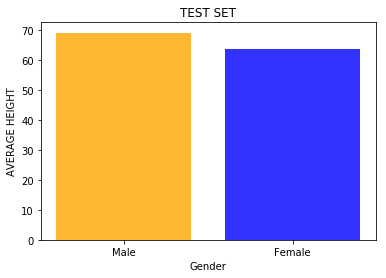

In [30]:

testdf=pd.concat([y_test,X_test],axis=1)
testdf.reset_index(inplace=True)
testdf.drop(columns=['index'],axis=1,inplace=True)


mean_male_height=testdf[testdf.Gender=="Male"].Height.mean()
mean_male_weight=testdf[testdf.Gender=="Male"].Weight.mean()
mean_female_height=testdf[testdf.Gender=="Female"].Height.mean()
mean_female_weight=testdf[testdf.Gender=="Female"].Weight.mean()



plt.bar([0,1],[mean_male_height,mean_female_height],width=0.8,color=['orange','blue'],alpha=0.8)
plt.xticks([0,1],['Male','Female'])
plt.xlabel('Gender')
plt.ylabel('AVERAGE HEIGHT')
plt.title('TEST SET')


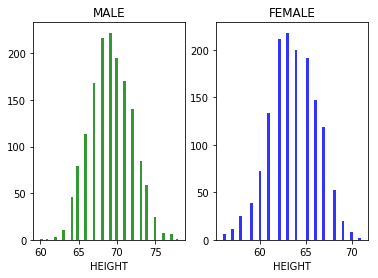

In [32]:
mh=newdf[newdf.Gender=='Male'].Height.round()
fh=newdf[newdf.Gender=="Female"].Height.round()

# fig = plt.figure()
fig, (ax1,ax2) = plt.subplots(ncols=2)
numBins = 50

ax1.hist(mh,numBins,color='green',alpha=0.8)
ax1.set_xlabel("HEIGHT")
ax1.set_title("MALE")
ax2.hist(fh,numBins,color='blue',alpha=0.8)
ax2.set_xlabel("HEIGHT")
ax2.set_title("FEMALE")
plt.show()

# print(po.value_counts())

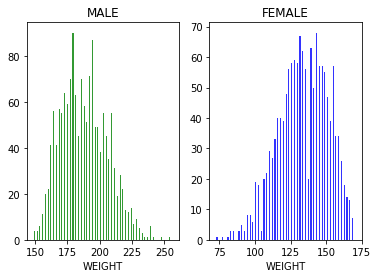

In [33]:
mw=newdf[newdf.Gender=='Male'].Weight.round()
fw=newdf[newdf.Gender=="Female"].Weight.round()

fig, (ax1,ax2) = plt.subplots(ncols=2)
numBins = 50

ax1.hist(mw,numBins,color='green',alpha=0.8,width=0.8)
ax1.set_xlabel("WEIGHT")
ax1.set_title("MALE")
ax2.hist(fw,numBins,color='blue',alpha=0.8,width=0.8)
ax2.set_xlabel("WEIGHT")
ax2.set_title("FEMALE")
plt.show()

In [34]:
ind=y_pred_df.index[y_pred_df.Gender=='Male']

print('Old')
print(df.std())
print()
print('Training')
print(X_train.std())
print()
print('Dataframe')
print(newdf.std())
 

Old
Height     3.847528
Weight    32.108439
dtype: float64

Training
Weight    32.020745
Height     3.845216
dtype: float64

Dataframe
Weight    32.298122
Height     3.851300
dtype: float64


In [35]:
weight=input(" Enter Weight ")
height=input(" Enter Height ")
data=[[float(height)/2.54,float(weight)/0.4535]]
data_scaled=scaler.transform(data)
print(kn.predict(data_scaled))




 Enter Weight 45
 Enter Height 99
['Male']


## Feature Engineering

In [36]:
newdf['BMI']=newdf['Weight']*703/(newdf['Height'])**2

cat=[]
for bmi in newdf['BMI']:
    if(bmi<18.5):
        Category='Underweight'
    elif(bmi>=18.5 and bmi<=24.9):
        Category="Healthy"
    elif(bmi>=25 and bmi<=29.9):
        Category="Overweight"
    elif(bmi>=30 and bmi<=39.9):
        Category="Obese"
    cat.append(Category)

newdf['Category']=cat
newdf.head(20)

,Gender,Weight,Height,BMI,Category
0,Male,173.115813,68.687232,25.795267,Overweight
1,Male,195.162042,68.829334,28.960333,Overweight
2,Male,170.217451,66.398128,27.142368,Overweight
3,Male,215.049660,71.929340,29.220116,Overweight
4,Male,182.721452,67.042903,28.578488,Overweight
5,Female,136.434393,65.310436,22.486094,Healthy
6,Male,169.326284,66.045444,27.289399,Overweight
7,Female,150.881330,66.759071,23.799633,Healthy
8,Female,114.766882,62.598648,20.589320,Healthy
9,Female,144.591922,63.596455,25.132375,Overweight


In [40]:
type(Category)
Category=np.asarray(Category)
type(Category)

numpy.ndarray

In [41]:
newdf[newdf.Category=='Overweight'][['Weight','Height','Gender']]

,Weight,Height,Gender
0,173.115813,68.687232,Male
1,195.162042,68.829334,Male
2,170.217451,66.398128,Male
3,215.049660,71.929340,Male
4,182.721452,67.042903,Male
6,169.326284,66.045444,Male
9,144.591922,63.596455,Female
10,188.395182,72.664504,Male
12,146.265815,63.986709,Female
14,203.988288,72.316140,Male


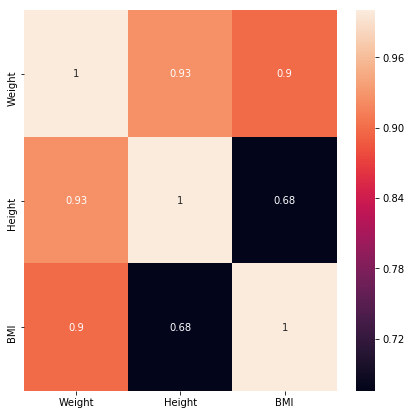

In [42]:
plt.figure(figsize=[7,7])
sns.heatmap(newdf.corr(),annot=True)